Word 'word2vec' not found in the model vocabulary.
Word 'word2vec' not found in the model vocabulary.


SVM Classifier trained with Word2Vec embeddings.


#
start from here

#*VGG19*
a convolutional neural network (CNN) that's used for large-scale image recognition

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds  # data set
from tensorflow.keras.utils import to_categorical


In [ ]:
#Loading images and labels
# train data and train label 70%
#test data and test label  30%
(train_ds, train_labels), (test_ds, test_labels) = tfds.load("tf_flowers",split=["train[:70%]", "train[:30%]"],batch_size=-1, as_supervised=True)
# batch_size=-1 for loading the data at once

In [ ]:
### Resizing images
train_ds = tf.image.resize(train_ds, (150, 150))
test_ds = tf.image.resize(test_ds, (150, 150))

## Transforming labels to correct format
train_labels = to_categorical(train_labels, num_classes=5)
test_labels = to_categorical(test_labels, num_classes=5)




In [ ]:

from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
## Loading VGG19 model
base_model = VGG19(weights="imagenet", include_top=False, input_shape=train_ds[0].shape)
#include_top=False----This allows you to add your own custom layers for your specific task.
#train_ds[0].shape is used to match the input shape of the training dataset.
base_model.trainable = False ## Not trainable weights
## Preprocessing input
train_ds = preprocess_input(train_ds)
test_ds = preprocess_input(test_ds)
#preprocess_input usually scales and normalizes the input image

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
#the pre trained model vgg19
base_model.summary()


Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
# making our neural networks
from tensorflow.keras import layers, models
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(5, activation='softmax')


In [ ]:
# sequencing the model
'''1.vgg19
  2.faltten
  3.dense1
  4.dense2
  5.prediction layer (softmaax)
  '''
from tensorflow.keras.layers import Dropout
model = models.Sequential([
base_model,
flatten_layer,
Dropout(0.5),
dense_layer_1,
Dropout(0.5),
dense_layer_2,
prediction_layer
])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'],)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True)

history = model.fit(train_ds, train_labels, epochs=30, validation_split=0.2, batch_size=30, callbacks=[es])


Epoch 1/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 14s 148ms/step - accuracy: 0.6528 - loss: 1.0056 - val_accuracy: 0.6576 - val_loss: 1.0017
Epoch 2/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.6419 - loss: 1.0784 - val_accuracy: 0.6965 - val_loss: 0.9494
Epoch 3/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 12s 116ms/step - accuracy: 0.6111 - loss: 0.9862 - val_accuracy: 0.7140 - val_loss: 0.9740
Epoch 4/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.6628 - loss: 0.8928 - val_accuracy: 0.6770 - val_loss: 0.9955
Epoch 5/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - accuracy: 0.6716 - loss: 0.8807 - val_accuracy: 0.6751 - val_loss: 0.9753
Epoch 6/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.6522 - loss: 0.8665 - val_accuracy: 0.7160 - val_loss: 0.8822
Epoch 7/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.6682 - loss: 0.8607 - val_accuracy: 0.7043 - val_loss: 0.9163
Epoch 8/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - accuracy: 0.6661 - loss: 0.8484 - val_accuracy: 0.71

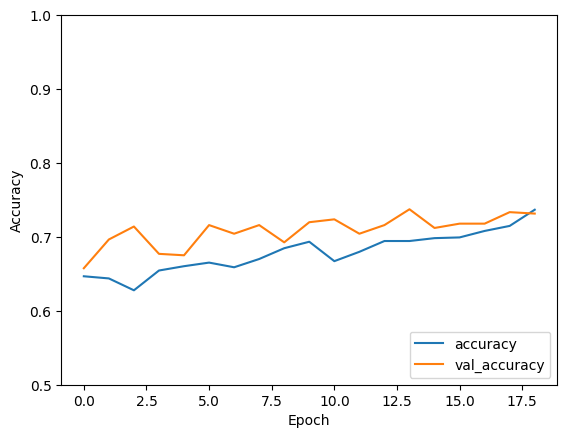

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


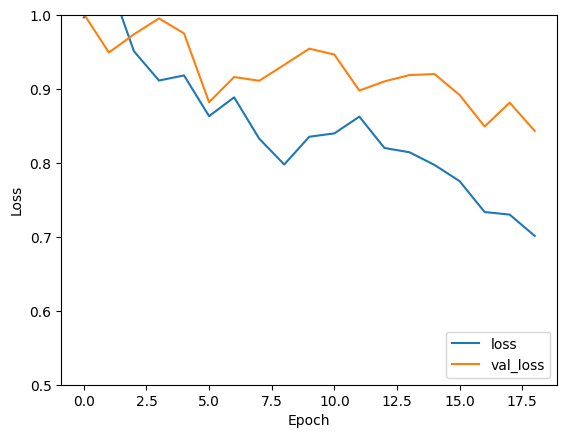

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


#*VGG16*


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.utils import to_categorical
#Loading images and labels
(train_ds, train_labels), (test_ds, test_labels) = tfds.load("tf_flowers",split=["train[:70%]", "train[:30%]"],batch_size=-1, as_supervised=True)

In [ ]:
## Resizing images
train_ds = tf.image.resize(train_ds, (150, 150))
test_ds = tf.image.resize(test_ds, (150, 150))
## Transforming labels to correct format
train_labels = to_categorical(train_labels, num_classes=5)
test_labels = to_categorical(test_labels, num_classes=5)
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
## Loading VGG19 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=train_ds[0].shape)
base_model.trainable = False ## Not trainable weights
## Preprocessing input
train_ds = preprocess_input(train_ds)
test_ds = preprocess_input(test_ds)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
base_model.summary()


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
from tensorflow.keras import layers, models
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(5, activation='softmax')


In [ ]:
model = models.Sequential([
base_model,
flatten_layer,
dense_layer_1,
Dropout(0.2),
dense_layer_2,
prediction_layer
])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'],)

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True)

history=model.fit(train_ds, train_labels, epochs=20, validation_split=0.2, batch_size=32, callbacks=[es])

Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 25s 217ms/step - accuracy: 0.3340 - loss: 3.5180 - val_accuracy: 0.4981 - val_loss: 1.2585
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.5258 - loss: 1.2669 - val_accuracy: 0.6012 - val_loss: 1.1012
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.6176 - loss: 0.9974 - val_accuracy: 0.6615 - val_loss: 0.9660
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.6724 - loss: 0.8771 - val_accuracy: 0.6926 - val_loss: 0.9079
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.7235 - loss: 0.7323 - val_accuracy: 0.6946 - val_loss: 0.8512
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.7466 - loss: 0.6543 - val_accuracy: 0.7237 - val_loss: 0.8007
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.7653 - loss: 0.5412 - val_accuracy: 0.7121 - val_loss: 0.7461
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.7962 - loss: 0.4867 - val_accuracy: 0.729

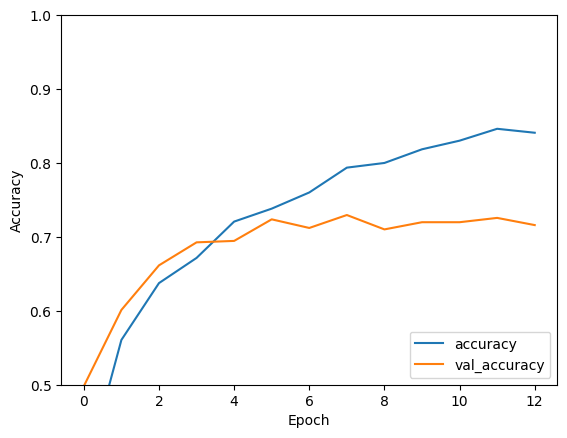

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


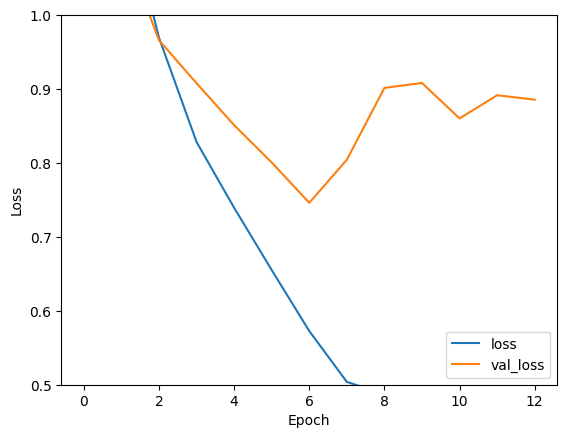

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


##MOBILENET

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input #Fixed typo to mobilenet_v2
import matplotlib.pyplot as plt
from tensorflow.keras import layers,models #Fixed typo to layers
from tensorflow.keras.layers import Dropout #Fixed typo to tensorflow and Dropout
from tensorflow.keras.callbacks import EarlyStopping #Fixed typo to tensorflow and EarlyStopping

In [ ]:

(train_ds, train_labels), (test_ds, test_labels) = tfds.load("tf_flowers",split=["train[:70%]", "train[:30%]"],batch_size=-1, as_supervised=True)
## Resizing images
train_ds = tf.image.resize(train_ds, (150, 150))
test_ds = tf.image.resize(test_ds, (150, 150))
## Transforming labels to correct format
train_labels = to_categorical(train_labels, num_classes=5)
test_labels = to_categorical(test_labels, num_classes=5)

In [ ]:
for layer in model.layers:
    layer.trainable = False


In [ ]:
# Loading MobileNetV2 model with pre-trained weights, excluding the top layers
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=train_ds[0].shape)
base_model.trainable = False  # Freezing the base model weights

# Preprocessing input for MobileNetV2
train_ds = preprocess_input(train_ds)
test_ds = preprocess_input(test_ds)

# Summary of the base MobileNetV2 model
base_model.summary()


<ipython-input-38-fea27c1456af>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=train_ds[0].shape)


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 150, 150, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 75, 75, 32)     │            864 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 75, 75, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 75, 75, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 75, 75, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 75, 75, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 75, 75, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 75, 75, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 75, 75, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 75, 75, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 75, 75, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 75, 75, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 77, 77, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 38, 38, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# Adding custom layers on top of the MobileNetV2 base model
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(5, activation='softmax')

# Building the final model
model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    layers.Dropout(0.2),  # Adding Dropout to avoid overfitting
    dense_layer_2,
    prediction_layer
])

In [ ]:
# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Setting up EarlyStopping callback to prevent overfitting and restore best weights
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True)

# Training the model
history = model.fit(train_ds, train_labels, epochs=20, validation_split=0.2, batch_size=32, callbacks=[es])

Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 22s 184ms/step - accuracy: 0.3167 - loss: 2.8796 - val_accuracy: 0.4747 - val_loss: 1.2014
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.4962 - loss: 1.1797 - val_accuracy: 0.6031 - val_loss: 1.0629
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.5626 - loss: 1.0420 - val_accuracy: 0.6226 - val_loss: 0.9602
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.5990 - loss: 0.9576 - val_accuracy: 0.6498 - val_loss: 0.8994
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6280 - loss: 0.8648 - val_accuracy: 0.6790 - val_loss: 0.8122
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6978 - loss: 0.7389 - val_accuracy: 0.6829 - val_loss: 0.8274
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7038 - loss: 0.7290 - val_accuracy: 0.7082 - val_loss: 0.8049
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7334 - loss: 0.6278 - val_accuracy: 0.7101 -

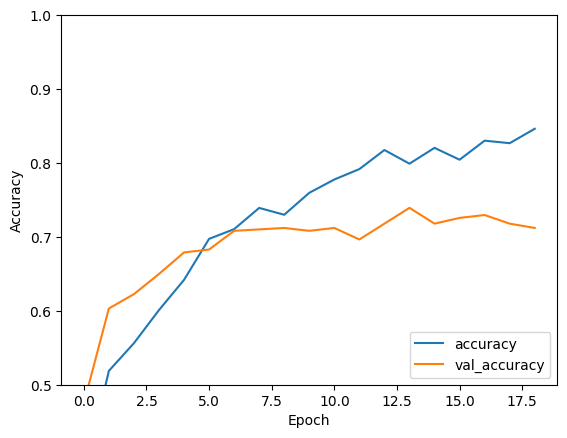

In [ ]:

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()


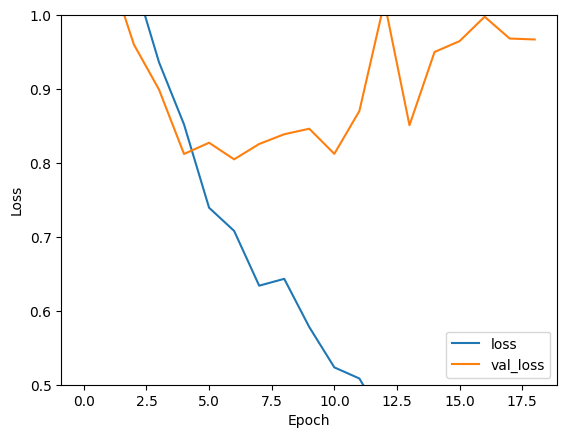

In [ ]:

# Plotting loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

#resnet50


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50  import preprocess_input
from tensorflow.keras import models,layers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [ ]:
(train_ds, train_labels), (test_ds, test_labels) = tfds.load("tf_flowers",split=["train[:70%]", "train[:30%]"],batch_size=-1, as_supervised=True)

In [ ]:
train_ds=tf.image.resize(train_ds,(150,150))
test_ds=tf.image.resize(test_ds,(150,150))

In [ ]:
train_labels=to_categorical(train_labels,num_classes=5)
test_labels=to_categorical(test_labels,num_classes=5)

In [ ]:
base_model_resnet=ResNet50(weights="imagenet", include_top=False, input_shape=train_ds[0].shape)
base_model_resnet.trainable=False

In [ ]:
# preporocess using resnet
train_ds=preprocess_input(train_ds)
test_ds=preprocess_input(test_ds)

In [ ]:
base_model_resnet.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 150, 150, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 156, 156, 3)    │              0 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 75, 75, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 75, 75, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 75, 75, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 77, 77, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 38, 38, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 38, 38, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 38, 38, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 38, 38, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 38, 38, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 38, 38, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 38, 38, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 38, 38, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 38, 38, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
#adding nerural layer
flatten_layer=layers.Flatten()
dense_layer1=layers.Dense(50,activation="relu")
dense_layer2=layers.Dense(20,activation="relu")
dense_layer3=layers.Dense(10,activation="relu")
predec_layer=layers.Dense(5,activation="softmax")

In [ ]:
# building a model
model=models.Sequential([
    base_model_resnet,
    flatten_layer,
    dense_layer1,
    layers.Dropout(0.2),
    dense_layer2,
    layers.Dropout(0.2),
    dense_layer3,
    predec_layer

])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Setting up EarlyStopping callback to prevent overfitting and restore best weights
es = EarlyStopping(monitor='cal_accuracy', mode='max', patience=5, restore_best_weights=True)

# Training the model
history = model.fit(train_ds, train_labels, epochs=20, validation_split=0.2, batch_size=32, callbacks=[es])

Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 30s 238ms/step - accuracy: 0.2560 - loss: 2.8777 - val_accuracy: 0.4066 - val_loss: 1.4258
Epoch 2/20


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `cal_accuracy` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - accuracy: 0.4113 - loss: 1.4586 - val_accuracy: 0.4300 - val_loss: 1.2790
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.4750 - loss: 1.3128 - val_accuracy: 0.5875 - val_loss: 1.0939
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.5098 - loss: 1.2106 - val_accuracy: 0.6167 - val_loss: 1.0369
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.5227 - loss: 1.1648 - val_accuracy: 0.6226 - val_loss: 1.0684
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.5449 - loss: 1.1155 - val_accuracy: 0.6109 - val_loss: 1.0174
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.5756 - loss: 1.0652 - val_accuracy: 0.6206 - val_loss: 0.9719
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.5942 - loss: 0.9949 - val_accuracy: 0.6245 - val_loss: 1.0272
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.6057 - loss: 0.9855 - val_accuracy: 0.6323 - val_loss: 0

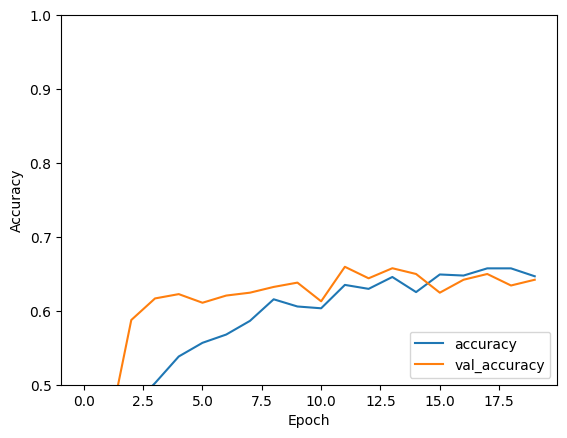

In [ ]:
# Plotting accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

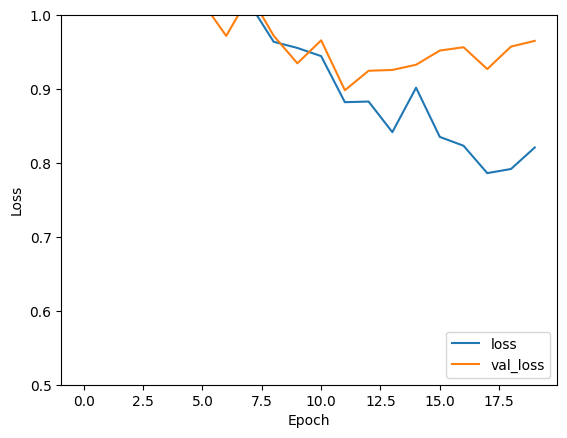

In [ ]:

# Plotting loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

#**model comparision**

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16, VGG19, MobileNetV2, ResNet50
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_input_vgg
from tensorflow.keras.applications.vgg19 import preprocess_input as preprocess_input_vgg19
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_input_mobilenet
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_input_resnet
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt



In [ ]:
# Loading dataset
(train_ds, train_labels), (test_ds, test_labels) = tfds.load("tf_flowers", split=["train[:70%]", "train[:30%]"], batch_size=-1, as_supervised=True)

# Resizing images to 150x150
train_ds = tf.image.resize(train_ds, (150, 150))
test_ds = tf.image.resize(test_ds, (150, 150))

# One-hot encoding labels
train_labels = to_categorical(train_labels, num_classes=5)
test_labels = to_categorical(test_labels, num_classes=5)



In [ ]:
# Callback for early stopping
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True)

# Function to build and train model
def build_and_train_model(base_model, preprocess_input_fn, model_name):
    # Preprocess input data
    train_ds_processed = preprocess_input_fn(train_ds)
    test_ds_processed = preprocess_input_fn(test_ds)

    # Base model setup
    base_model.trainable = False

    # Custom layers
    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(50, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(20, activation='relu'),
        layers.Dense(5, activation='softmax')
    ])


    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train model
    history = model.fit(train_ds_processed, train_labels, epochs=20, validation_split=0.2, batch_size=32, callbacks=[es], verbose=0)

    # Evaluate model
    evaluation = model.evaluate(test_ds_processed, test_labels, verbose=0)

    print(f"{model_name} - Test Accuracy: {evaluation[1]}, Test Loss: {evaluation[0]}")
    return history

NameError: name 'train_ds_processed' is not defined

In [ ]:


# Models to test
models_to_test = [
    ("VGG16", VGG16(weights="imagenet", include_top=False, input_shape=(150, 150, 3)), preprocess_input_vgg),
    ("VGG19", VGG19(weights="imagenet", include_top=False, input_shape=(150, 150, 3)), preprocess_input_vgg19),
    ("MobileNetV2", MobileNetV2(weights="imagenet", include_top=False, input_shape=(150, 150, 3)), preprocess_input_mobilenet),
    ("ResNet50", ResNet50(weights="imagenet", include_top=False, input_shape=(150, 150, 3)), preprocess_input_resnet),
]

# Store histories for comparison
histories = {}

# Train and evaluate each model
for model_name, base_model, preprocess_fn in models_to_test:
    print(f"Training {model_name}...")
    histories[model_name] = build_and_train_model(base_model, preprocess_fn, model_name)



58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


<ipython-input-52-a5c0c1f530cd>:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  ("MobileNetV2", MobileNetV2(weights="imagenet", include_top=False, input_shape=(150, 150, 3)), preprocess_input_mobilenet),


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training VGG16...
VGG16 - Test Accuracy: 0.9455040693283081, Test Loss: 0.16133353114128113
Training VGG19...
VGG19 - Test Accuracy: 0.6394187211990356, Test Loss: 1.030868649482727
Training MobileNetV2...
MobileNetV2 - Test Accuracy: 0.4450499415397644, Test Loss: 1.2528306245803833
Training ResNet50...
ResNet50 - Test Accuracy: 0.6185286045074463, Test Loss: 0.9683806896209717


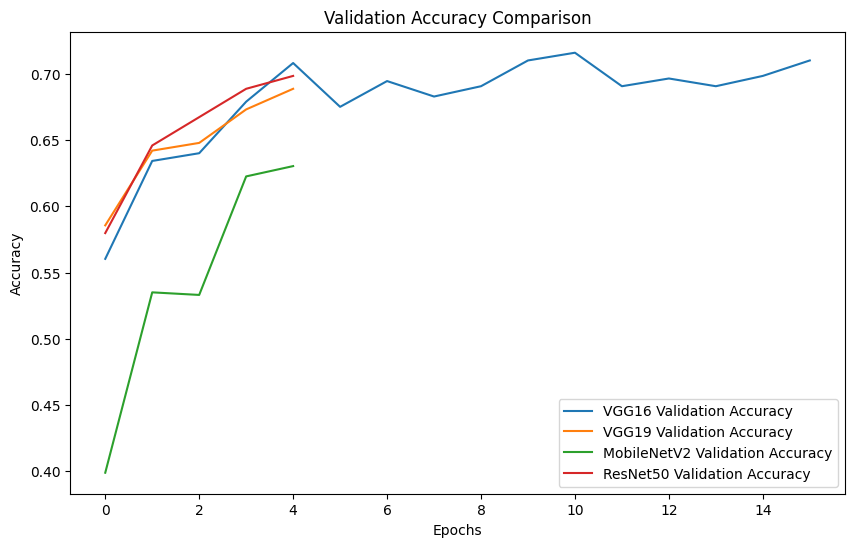

In [ ]:
# Plot accuracy comparison
plt.figure(figsize=(10, 6))
for model_name in histories:
    plt.plot(histories[model_name].history['val_accuracy'], label=f'{model_name} Validation Accuracy')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




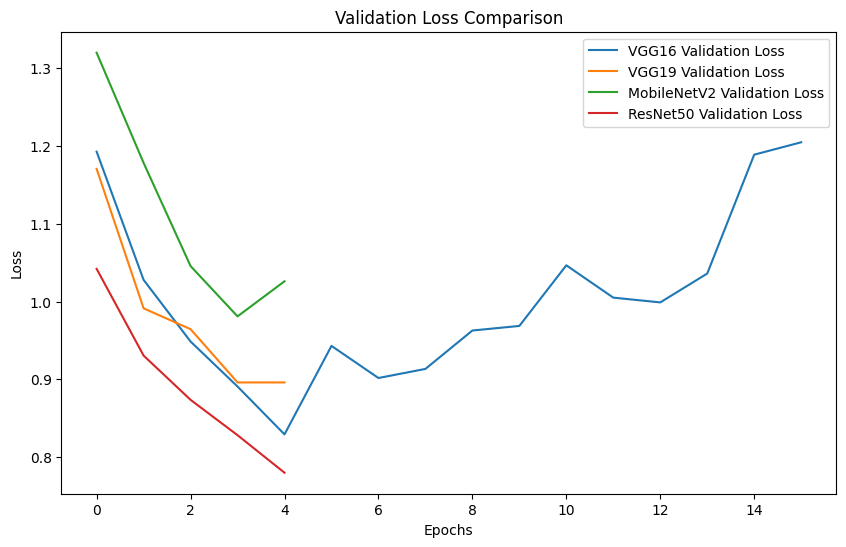

In [ ]:
# Plot loss comparison
plt.figure(figsize=(10, 6))
for model_name in histories:
    plt.plot(histories[model_name].history['val_loss'], label=f'{model_name} Validation Loss')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()